### Goals of tutorial
* feature jupyter as much as possible
* cover useful concepts related to nlp
* showcase core spacy capabilities
* showcase spacy integrations with other libs

### Before Running:
* Use python 3 to leverage the nbagg backend
* enable js widgets via `jupyter nbextension enable --py widgetsnbextension`.
    * ideally this would be with -sys-prefix but without is OK.

In [3]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [1]:
!pip install skater

  Using cached skater-1.0.0b.6.tar.gz
  Using cached scikit_learn-0.18.1-cp27-cp27mu-manylinux1_x86_64.whl
    100% |████████████████████████████████| 22.3MB 28kB/s  eta 0:00:01
    100% |████████████████████████████████| 256kB 5.0MB/s eta 0:00:01
    100% |████████████████████████████████| 563kB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 11.2MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 11.3MB/s ta 0:00:01
    100% |████████████████████████████████| 491kB 3.0MB/s eta 0:00:01
  Using cached numpy-1.12.1-cp27-cp27mu-manylinux1_x86_64.whl
    99% |████████████████████████████████| 45.0MB 85.5MB/s eta 0:00:01Killed


In [2]:
!pip3 install spacy
!python3 -m spacy download en


    100% |████████████████████████████████| 3.3MB 476kB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 11.4MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 10.1MB/s ta 0:00:01
    100% |████████████████████████████████| 931kB 1.7MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 11.4MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 6.3MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 12.2MB/s ta 0:00:01
    100% |████████████████████████████████| 604kB 2.4MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 10.9MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 12.0MB/s ta 0:00:01
    100% |████████████████████████████████| 389kB 3.6MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 12.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for spacy ... done
  Stored in directory: /home/jupyter/.cache/pip/wheels/4a/95/e1/701de56f43bdff4936a763e3e0826a5819f3f8b3bc1ea1a7ee
  

In [3]:
#!pip3 install spacy
#!python3 -m spacy download en
import spacy
nlp = spacy.load('en',parse=False, tag=False,entity=False)

### Load data for training sentiment model

In [46]:
!curl https://www.cs.jhu.edu/~mdredze/datasets/sentiment/unprocessed.tar.gz --output unprocessed.tar.gz 
!tar xzf unprocessed.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1512M  100 1512M    0     0  5360k      0  0:04:48  0:04:48 --:--:-- 5446k


In [150]:
import re
import codecs
import glob
import os
import pickle

r_header = '<review_text>'
r_body = '[\s\S]*?'
r_tail = '</review_text>'
re_doc = r_header + r_body + r_tail
re_clean = '({0}|{1})'.format(r_header, r_tail)

def get_reviews_from_file(file):
    with codecs.open(file, encoding='utf-8',errors='ignore') as f:
        big_string = f.read()

    reviews = re.findall(re_doc, big_string, flags=re.DOTALL)
    reviews = map(lambda review: re.sub(re_clean, "", review), reviews)
    return list(reviews)

data = {}
root = 'sorted_data'
for category in os.listdir(root):
    path = os.path.join(root, category)
    if os.path.isdir(path):
        positive = os.path.join(root, category, 'positive.review')
        negative = os.path.join(root, category, 'negative.review')
        print(category)
        data[category] = {}
        data[category]['positive'] = get_reviews_from_file(positive)
        data[category]['negative'] = get_reviews_from_file(negative)
        

with open('review-corpus.pkl', 'wb') as f:
    pickle.dump(data, f)

rm: cannot remove 'data.tar.gz': No such file or directory
rm: cannot remove 'unprocessed.tar.gz': No such file or directory


In [153]:
!ls

data.tar.gz	       processed_acl  review-corpus.pkl  unprocessed.tar.gz
interactive-nlp.ipynb  README.md      sorted_data	 untitled.txt


In [152]:
'https://spacy.io/docs/usage/deep-learning'

'https://spacy.io/docs/usage/deep-learning'

### Train sentiment model

In [6]:
response = urllib.request.urlopen(data_url)

### Build a basic widget

<IPython.core.display.Javascript object>


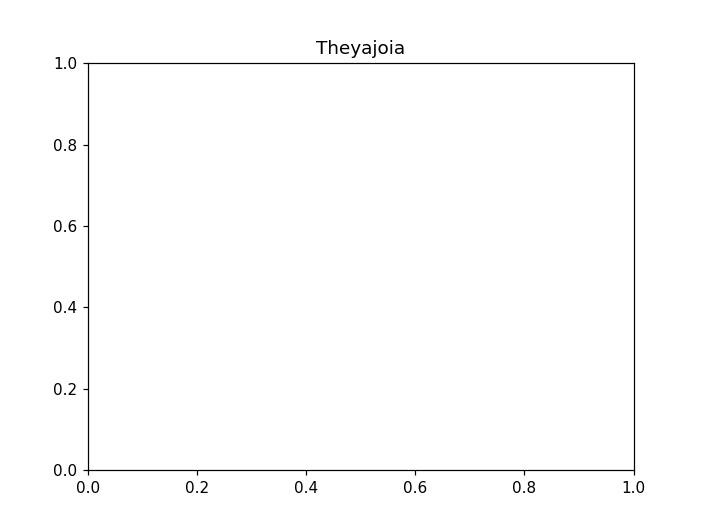

In [157]:
%matplotlib notebook
from ipywidgets import Layout, Button, Text
from IPython.display import display
from IPython.display import clear_output
import matplotlib.pyplot as plt

class TextApp(object):
    def __init__(self):

        self.text_box = Text()
        self.run_button = Button(description="Run Model")
        self.run_button.on_click(self.on_button_clicked)
        display(self.run_button)
        display(self.text_box)        
        self.ax = None
        self.f = None
        
    def on_button_clicked(self, b):
        #clear_output()
        if self.ax is None:
            self.f, self.ax = plt.subplots(1)
        
        plt.title(self.text_box.value)
        plt.show()

app = TextApp()

In [3]:
1

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
